4925 4925 2


epoch,train_loss,valid_loss,accuracy,time
0,1.430665,1.210234,0.604623,00:01


not enough values to plot a chart


(tensor([[3.3237e-01, 6.0093e-04, 1.8041e-02,  ..., 8.0254e-03, 6.0753e-03,
          2.4749e-02],
         [5.3727e-03, 1.7775e-04, 5.5181e-01,  ..., 1.3833e-01, 4.2530e-04,
          9.8979e-02],
         [2.8929e-02, 1.3578e-02, 1.7972e-01,  ..., 3.3791e-01, 1.0040e-02,
          8.7081e-03],
         ...,
         [1.4872e-02, 4.5517e-04, 4.4890e-01,  ..., 7.1398e-02, 7.8682e-04,
          2.9055e-01],
         [1.3491e-01, 6.7254e-04, 2.9309e-01,  ..., 4.0071e-01, 2.6771e-03,
          5.3951e-02],
         [5.8120e-03, 2.2543e-04, 3.7824e-01,  ..., 3.8539e-01, 4.0354e-04,
          8.4135e-02]]),
 None,
 array(['88', '42', '90', ..., '42', '90', '90'], dtype='<U2'))

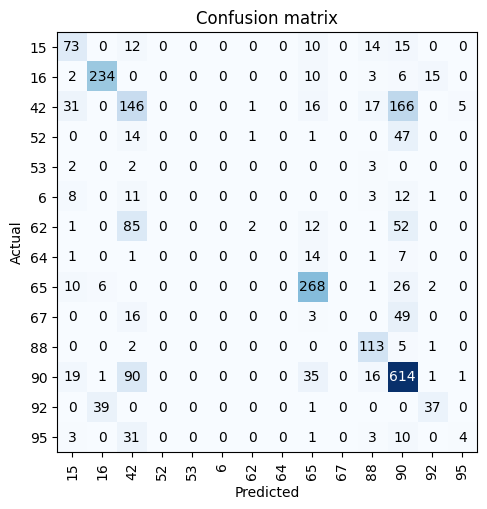

In [7]:
from tsai.basics import *

X, y, splits = get_classification_data('LSST', split_data=False)
print(len(X), len(y), len(splits))
# print(splits)
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
mv_clf = TSClassifier(X, y, splits=splits, path='models', arch="InceptionTimePlus", tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy) # , cbs=ShowGraph() no graph
mv_clf.fit_one_cycle(1, 1e-2)
mv_clf.export("mv_clf.pkl")
mv_clf.plot_metrics()
mv_clf.plot_confusion_matrix()
from tsai.inference import load_learner

mv_clf = load_learner("models/mv_clf.pkl")
X_test = X[splits[1]]
y_test = y[splits[1]]
test_probas, test_targets, test_preds = mv_clf.get_X_preds(X_test, with_decoded=True)


# print(probas, target, preds)

import torch
from fastcore.test import test_close

torch_test_probas, torch_test_targets, torch_test_preds = mv_clf.get_X_preds(torch.from_numpy(X_test), with_decoded=True)
torch_test_probas, torch_test_targets, torch_test_preds


not enough values to plot a chart
